In [ ]:
import numpy as np
import scipy.spatial.distance as dist
import matplotlib.pyplot as plt


In [2]:

def compute_vat(data):
    """Compute VAT reordered distance matrix and plot it."""
    # Step 1: Compute pairwise dissimilarity matrix (Euclidean distance)
    dist_matrix = dist.squareform(dist.pdist(data, metric='euclidean'))

    # Step 2: Initialize variables for reordering
    N = dist_matrix.shape[0]
    I = np.arange(N)
    J = np.zeros(N, dtype=int)
    J[0] = np.argmax(dist_matrix) // N  # Start with the most distant point
    I = np.delete(I, J[0])
    
    # Step 3: Greedy selection to reorder points
    for i in range(1, N):
        idx = np.argmin(dist_matrix[J[:i]][:, I].max(axis=0))
        J[i] = I[idx]
        I = np.delete(I, idx)
    
    # Step 4: Reorder distance matrix
    ordered_matrix = dist_matrix[J][:, J]

    # Step 5: Plot VAT Image
    plt.figure(figsize=(6, 6))
    plt.imshow(ordered_matrix, cmap='gray', aspect='auto')
    plt.colorbar(label='Distance')
    plt.title("VAT Reordered Distance Matrix")
    plt.show()
    
    return ordered_matrix


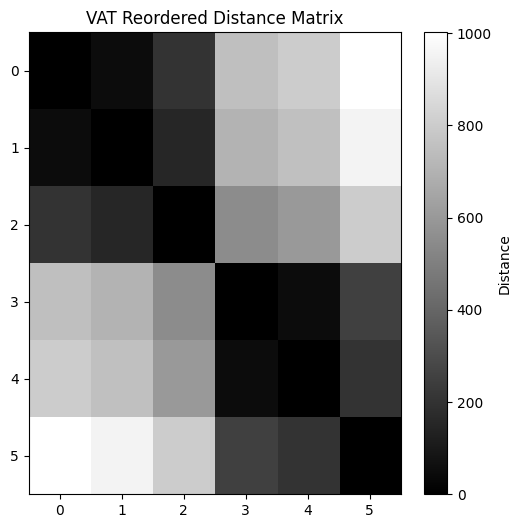

In [ ]:


# Sample Real-Life Dataset: Customer Purchases
# Columns: [Total Purchases, Average Purchase Value, Number of Store Visits]
customers = np.array([
    [5, 200, 3], 
    [50, 1000, 20],
    [6, 250, 4],   
    [45, 950, 18], 
    [10, 400, 5], 
    [60, 1200, 25] 
])


vat_matrix = compute_vat(customers)
